# Data is the new oil

<div>
<img src="images/info.png" width="500"/>
</div>

[Image source](https://www.stadafa.com/2021/10/largest-companies-2010-vs-2021.html)


Clive Humby, a british mathematician, is credited with coining the phrase "data is the new oil." 

This quote was expanded by Michael Palmer with the assertion that data is "valuable, but if unrefined it cannot really be used.  Oil has to be changed into gas, plastic, chemicals, etc to create a valuable entity that drives profitable activity; so, data must be broken down and analysed for it to have value."


# Public data APIs

How do we access amazing data? The answer is data APIs.

## What is an API?

API stands for Application Programming Interface and it serves as a data transmitter between two different pieces of software. The term has historically been used to describe any sort of connectivity interface to an application. 

Today, the term API typically takes an additional meaning:
- Modern APIs adhere to certain standards (typically HTTP and REST) 
- They are treated like products
- They often adhere to high security standards

We usually have two interfaces for Software:

- UI (User Interface) - humans talking to computers
- API - computers talking to computers


## Types of APIs

### By availability

- **Open and public APIs** are available to everyone. Open APIs will be completely open, in the sense that they will provide access to the complete architecture and all features of their code.  Public APIs, contrarily, will provide restricted access to the codes and datasets.

<img src="images/open-apis.png" width=400 height=400 />

- **Internal APIs** are used in-house by developers.

- **Partner APIs** are a form of open API where access is granted under certain conditions determined by the publisher.

### By structure
APIs also differ in architecture. The most popular API architectures are:
- **JSON-RPC and XML-RPC**
RPC stands for Remote Procedure Call and is a protocol for data transmission in JSON or XML format. 
- **REST**
REST stands for representational state transfer. It's a software architectural style that provides a set of recommendations for web development. 
- **SOAP** stands for simple object access protocol and is a definition of API protocols and standards.  

## Accessing a Public Data API with Python

In order to retrieve data from an API we will combine the ``request`` library and the ``JSON`` library.

When we want to receive data from the API we first make a *request*.

To do so in python, we need to install the ``requests`` library.

In [1]:
import requests

### Example: NASA's APOD API

Let us test out [NASA's open API](https://api.nasa.gov/):

In [2]:
demo_key = "DEMO_KEY"

url = "https://api.nasa.gov/planetary/apod?api_key=" + demo_key

response = requests.get(url)
response

200 https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY
headers:   Access-Control-Allow-Origin: *
  Access-Control-Expose-Headers: X-RateLimit-Limit, X-RateLimit-Remaining
  Age: 0
  Connection: keep-alive
  Content-Encoding: gzip
  Content-Type: application/json
  Date: Thu, 27 Oct 2022 08:23:59 GMT
  Strict-Transport-Security: max-age=31536000; preload
  Transfer-Encoding: chunked
  Vary: Accept-Encoding
  Via: http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])
  X-Cache: MISS
  X-Content-Type-Options: nosniff
  X-Frame-Options: DENY
  X-Ratelimit-Limit: 40
  X-Ratelimit-Remaining: 39
  X-Vcap-Request-Id: e9dffe1f-c620-4e44-414b-d635db5286df
  X-XSS-Protection: 1; mode=block

body (application/json):
{'copyright': 'Neelam and Ajay Talwar',
 'date': '2022-10-27',
 'explanation': "On October 25th, Sun and New Moon set together as seen from Agra, India. Their close conjunction near the western horizon, a partial solar eclipse, was captured in this elevated view in hazy skies near the

In [3]:
import json

data = response.json()
from IPython.core.display import HTML
from IPython.display import Image

print(response.json()["explanation"])
Image(url=data["url"], width=600)

On October 25th, Sun and New Moon set together as seen from Agra, India. Their close conjunction near the western horizon, a partial solar eclipse, was captured in this elevated view in hazy skies near the solitary dome of the Taj Mahal. Of course, the partial solar eclipse was also seen from most of Europe, northern Africa, the Middle East, and western parts of Asia. This eclipse was the last of two solar eclipses (both partial eclipses) in 2022. But the next Full Moon will slide through planet Earth's shadow on November 7/8, in a total lunar eclipse.


## Key concepts:

**Get and post**

The two most common requests we make are ``get`` and ``post``:
- `GET` is used for viewing (without changing)
- `POST` is used for changing, and sometimes viewing data

**Response codes**

We can check the response code to see if our request was successfull. 

In [4]:
if 200 <= response.status_code < 300:
    print("Request succeeded!")
else:
    print(f"Uh oh, we got response code {response.status_code}...")

Request succeeded!


Here are some common status codes: 

(defined by HTTP)

| Code | Status | Description |
| --- | --- | --- |
| 200 | OK | The request was successfully completed   |
| 400 | Bad request| The request was invalid. |
| 401 | Unauthorized | The request did not include an authentication token or the authentication token was expired. |
| 403 | Forbidden | The client did not have permission to access the requested resource. |
| 404 | Not Found | The requested resource was not found. |
| 405 | Not Allowed | The client did not have permission to access the requested resource. |
| 500 | Internal Server Error | The request was not completed due to an internal error on the server side. |
| 503 | Service unavailable | The server was unavailable. |

**Headers**

We can communicate metadata (like who we are) to the API by means of a *header*.

The server also communicates back to us with a header:


In [5]:
dict(response.headers)

{'Date': 'Thu, 27 Oct 2022 08:23:59 GMT',
 'Content-Type': 'application/json',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'Vary': 'Accept-Encoding',
 'Access-Control-Allow-Origin': '*',
 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining',
 'Age': '0',
 'Strict-Transport-Security': 'max-age=31536000; preload',
 'Via': 'http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])',
 'X-Cache': 'MISS',
 'X-Ratelimit-Limit': '40',
 'X-Ratelimit-Remaining': '39',
 'X-Vcap-Request-Id': 'e9dffe1f-c620-4e44-414b-d635db5286df',
 'X-Frame-Options': 'DENY',
 'X-Content-Type-Options': 'nosniff',
 'X-XSS-Protection': '1; mode=block',
 'Content-Encoding': 'gzip'}

**Etiquette** 

When you access a public data API you are expected to follow the playing rules of the API. Therefore you should always start by checking the documentation on the website for the API.

<div>
<img src="images/rtfm.png" width="250"/>
</div>


### Exercise

Make a request to a public API

For examples:

- https://publicapis.dev
- https://www.api.toys/api/


In [10]:
url = "https://www.api.toys/api/dice_roll"
r = requests.get(url, params={"sides": 6, "rolls": 3})
r.json()

{'dice': 'd6', 'rolls': [6, 4, 6]}

In [11]:
url = "https://meowfacts.herokuapp.com/"
r = requests.get(url)

data = r.json()
data

{'data': ['Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spayed female cats the best.']}

In [12]:
facts = data["data"]
for fact in facts:
    print(fact)

Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spayed female cats the best.


In [ ]:
requests.get?

-----------
## Data formats


The actual data typically gets returned in a ``JSON``, ``XML`` or ``CSV file``.


### CSV

A Comma-Separated Values file is a delimited text file that uses a comma to separate values. It typically stores *tabular data*.

<div>
<img src="images/covid-nums.png" width="300"/>
</div>

*Example*: FHI provides [data](https://www.fhi.no/sv/smittsomme-sykdommer/corona/dags--og-ukerapporter/dags--og-ukerapporter-om-koronavirus/) about the number of confirmed COVID cases in Norway as a .csv file.



### JSON
JSON is the most common way of sending data back and forth in APIs. 

A JavaScript Object Notation (JSON) file encodes *data structures* so that they are easy to read for machines and somewhat easy to read for humans.

JSON is a text file or string that follows the JavaScript object syntax. Most programming languages will have the ability to read (parse) and generate JSON files. 

The ``json`` library in Python has two main functions:
- `json.dumps()` Takes in a python object and converts it (dumps it) to a string
- `json.loads()` Takes in a JSON string and converts it (loads it) to a Python object.

which will convert from/to the following formats

| JSON | Python | 
| --- | --- | 
| object | dict | 
| array  | list | 
| string | str  | 
| number |  int or float | 
| true | True | 
| false | False | 
| null | None | 


Let's look at what NASA gave us


In [ ]:
# Load data using response.json
response.json?

In [13]:
data = response.json()

print("response.json is a " + str(type(data)))
print("Printing it yields: ")

data

response.json is a <class 'dict'>
Printing it yields: 


{'copyright': 'Neelam and Ajay Talwar',
 'date': '2022-10-27',
 'explanation': "On October 25th, Sun and New Moon set together as seen from Agra, India. Their close conjunction near the western horizon, a partial solar eclipse, was captured in this elevated view in hazy skies near the solitary dome of the Taj Mahal. Of course, the partial solar eclipse was also seen from most of Europe, northern Africa, the Middle East, and western parts of Asia. This eclipse was the last of two solar eclipses (both partial eclipses) in 2022. But the next Full Moon will slide through planet Earth's shadow on November 7/8, in a total lunar eclipse.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2210/2022-10-25pseTaj.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'Sunset, Moonset, Taj Mahal',
 'url': 'https://apod.nasa.gov/apod/image/2210/2022-10-25pseTaj600h.jpg'}

-------

### Exercise

2. Make a get request from the [NASA Mars Rover API](https://api.nasa.gov/) to get pictures from Mars. 
3. Specifiy the camera viewpoint in parameters

In [16]:
# Get satellite image from Houston
parameters = {
    "sol": 1000,
}

url = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?page=1&api_key=DEMO_KEY"
r = requests.get(url, params=parameters)

from IPython.display import JSON

JSON(r.json())

<IPython.core.display.JSON object>

## Entur API

The NASA is a good 'hello world' example of APIs but it does not quite showcase the usefullness of APIs. 

Entur has APIs is an example of an open API, that features both an open source code and APIs for stops, real-time data, mobility trends etc.

The following snippet is adapted from [ruterstop](https://github.com/stigok/ruterstop) by [stigok](https://github.com/stigok):

In [17]:
stop_id = 5926

__version__ = "0.5.1"

ENTUR_CLIENT_ID = __version__

ENTUR_GRAPHQL_ENDPOINT = "https://api.entur.io/journey-planner/v2/graphql"

ENTUR_GRAPHQL_QUERY = """
{
  stopPlace(id: "NSR:StopPlace:$STOP_ID") {
    name
    estimatedCalls(timeRange: 72100, numberOfDepartures: 20) {
      expectedArrivalTime
      realtime
      destinationDisplay {
        frontText
      }
      serviceJourney {
        directionType
        line {
          publicCode
        }
      }
    }
  }
}
"""

headers = {
    "Accept": "application/json",
    "ET-Client-Name": "UIO:IN3110 - ingeborggjerde",
    "ET-Client-Id": ENTUR_CLIENT_ID,
}

qry = ENTUR_GRAPHQL_QUERY.replace("$STOP_ID", str(stop_id))
res = requests.post(
    ENTUR_GRAPHQL_ENDPOINT,
    headers=headers,
    timeout=5,
    json=dict(query=qry, variables={}),
)

In [19]:
JSON(res.json())

<IPython.core.display.JSON object>

## Getting public API data into pandas

Let's check the weather

Yr has an API: https://developer.yr.no

They ask you to identify yourself in the User-Agent header: https://developer.yr.no/doc/TermsOfService/

In [20]:
url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=51.5&lon=0"
s = requests.Session()
s.headers[
    "User-Agent"
] = "uio-in3110 https://github.com/uio-in3110/uio-in3110.github.io"
r = s.get(url)
r

200 https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=51.5&lon=0
headers:   Accept-Ranges: bytes
  Access-Control-Allow-Headers: Origin
  Access-Control-Allow-Methods: GET
  Access-Control-Allow-Origin: *
  Age: 0
  Connection: keep-alive
  Content-Encoding: gzip
  Content-Length: 2811
  Content-Type: application/json
  Date: Thu, 27 Oct 2022 08:45:46 GMT
  Expires: Thu, 27 Oct 2022 09:17:18 GMT
  Last-Modified: Thu, 27 Oct 2022 08:45:46 GMT
  Server: nginx/1.18.0 (Ubuntu)
  Vary: Accept, Accept-Encoding
  Via: 1.1 varnish (Varnish/7.0)
  X-Backend-Host: b_157_249_76_16_loc
  X-Varnish: 766286289

body (application/json):
{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [0, 51.5, 4]},
 'properties': {'meta': {'updated_at': '2022-10-27T08:35:11Z',
   'units': {'air_pressure_at_sea_level': 'hPa',
    'air_temperature': 'celsius',
    'cloud_area_fraction': '%',
    'precipitation_amount': 'mm',
    'relative_humidity': '%',
    'wind_from_direction': 'degree

In [21]:
data = r.json()
record = data["properties"]["timeseries"][0]

In [23]:
JSON(data)

<IPython.core.display.JSON object>

In [22]:
from IPython.display import JSON

JSON(record)

<IPython.core.display.JSON object>

### Exercise

tidy a record dict:

- turn nested dictionary into one-level dictionary of keys, values
- add prefixes for nested keys that may conflict, e.g. 

In [24]:
next(iter(record["data"].items()))

('instant',
 {'details': {'air_pressure_at_sea_level': 1013.4,
   'air_temperature': 15.8,
   'cloud_area_fraction': 100.0,
   'relative_humidity': 86.0,
   'wind_from_direction': 166.1,
   'wind_speed': 5.8}})

In [25]:
def tidy_format(record):
    tidy_dict = {"time": record["time"]}
    for section, sub_dict in record["data"].items():
        for _, fields in sub_dict.items():
            for key, value in fields.items():
                if section == "instant":
                    tidy_key = key
                else:
                    tidy_key = f"{section}_{key}"
                tidy_dict[tidy_key] = value
    return tidy_dict


tidy_format(record)

{'time': '2022-10-27T08:00:00Z',
 'air_pressure_at_sea_level': 1013.4,
 'air_temperature': 15.8,
 'cloud_area_fraction': 100.0,
 'relative_humidity': 86.0,
 'wind_from_direction': 166.1,
 'wind_speed': 5.8,
 'next_12_hours_symbol_code': 'lightrainshowers_day',
 'next_1_hours_symbol_code': 'heavyrain',
 'next_1_hours_precipitation_amount': 2.4,
 'next_6_hours_symbol_code': 'rainshowers_day',
 'next_6_hours_precipitation_amount': 2.8}

In [27]:
tidy_records = [tidy_format(record) for record in r.json()["properties"]["timeseries"]]

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame.from_dict(tidy_records)

In [30]:
df

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount
0,2022-10-27T08:00:00Z,1013.4,15.8,100.0,86.0,166.1,5.8,lightrainshowers_day,heavyrain,2.4,rainshowers_day,2.8
1,2022-10-27T09:00:00Z,1013.8,15.8,100.0,90.8,177.2,4.6,partlycloudy_day,rain,0.4,partlycloudy_day,0.5
2,2022-10-27T10:00:00Z,1013.6,16.4,34.4,88.6,184.1,5.0,cloudy,fair_day,0.0,cloudy,0.1
3,2022-10-27T11:00:00Z,1013.5,18.8,91.4,83.5,192.8,4.7,cloudy,cloudy,0.0,cloudy,0.1
4,2022-10-27T12:00:00Z,1013.5,20.1,81.2,73.6,216.8,7.8,cloudy,partlycloudy_day,0.0,cloudy,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
86,2022-11-04T12:00:00Z,1006.2,13.5,100.0,66.5,217.1,5.7,lightrain,NaN,NaN,rain,2.6
87,2022-11-04T18:00:00Z,1002.2,12.3,100.0,81.6,203.2,8.0,rain,NaN,NaN,cloudy,0.3
88,2022-11-05T00:00:00Z,996.9,13.0,100.0,79.9,190.8,8.8,rainshowers_day,NaN,NaN,heavyrain,8.1
89,2022-11-05T06:00:00Z,993.3,11.4,100.0,85.5,199.9,6.3,NaN,NaN,NaN,rain,1.3


In [34]:
df = pd.DataFrame.from_dict(tidy_records)
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")
df

,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount
time,,,,,,,,,,,
2022-10-27 08:00:00+00:00,1013.4,15.8,100.0,86.0,166.1,5.8,lightrainshowers_day,heavyrain,2.4,rainshowers_day,2.8
2022-10-27 09:00:00+00:00,1013.8,15.8,100.0,90.8,177.2,4.6,partlycloudy_day,rain,0.4,partlycloudy_day,0.5
2022-10-27 10:00:00+00:00,1013.6,16.4,34.4,88.6,184.1,5.0,cloudy,fair_day,0.0,cloudy,0.1
2022-10-27 11:00:00+00:00,1013.5,18.8,91.4,83.5,192.8,4.7,cloudy,cloudy,0.0,cloudy,0.1
2022-10-27 12:00:00+00:00,1013.5,20.1,81.2,73.6,216.8,7.8,cloudy,partlycloudy_day,0.0,cloudy,0.1
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04 12:00:00+00:00,1006.2,13.5,100.0,66.5,217.1,5.7,lightrain,NaN,NaN,rain,2.6
2022-11-04 18:00:00+00:00,1002.2,12.3,100.0,81.6,203.2,8.0,rain,NaN,NaN,cloudy,0.3
2022-11-05 00:00:00+00:00,996.9,13.0,100.0,79.9,190.8,8.8,rainshowers_day,NaN,NaN,heavyrain,8.1


<AxesSubplot:xlabel='time'>

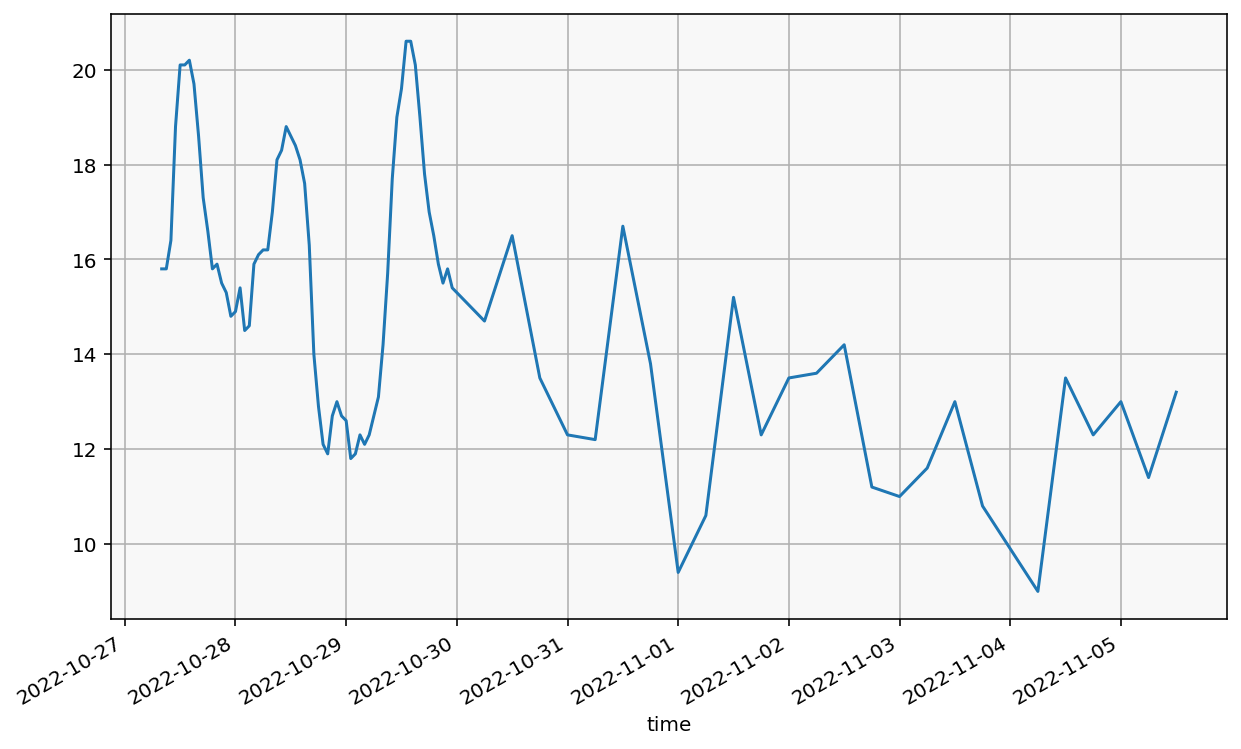

In [35]:
df.air_temperature.plot()

<AxesSubplot:>

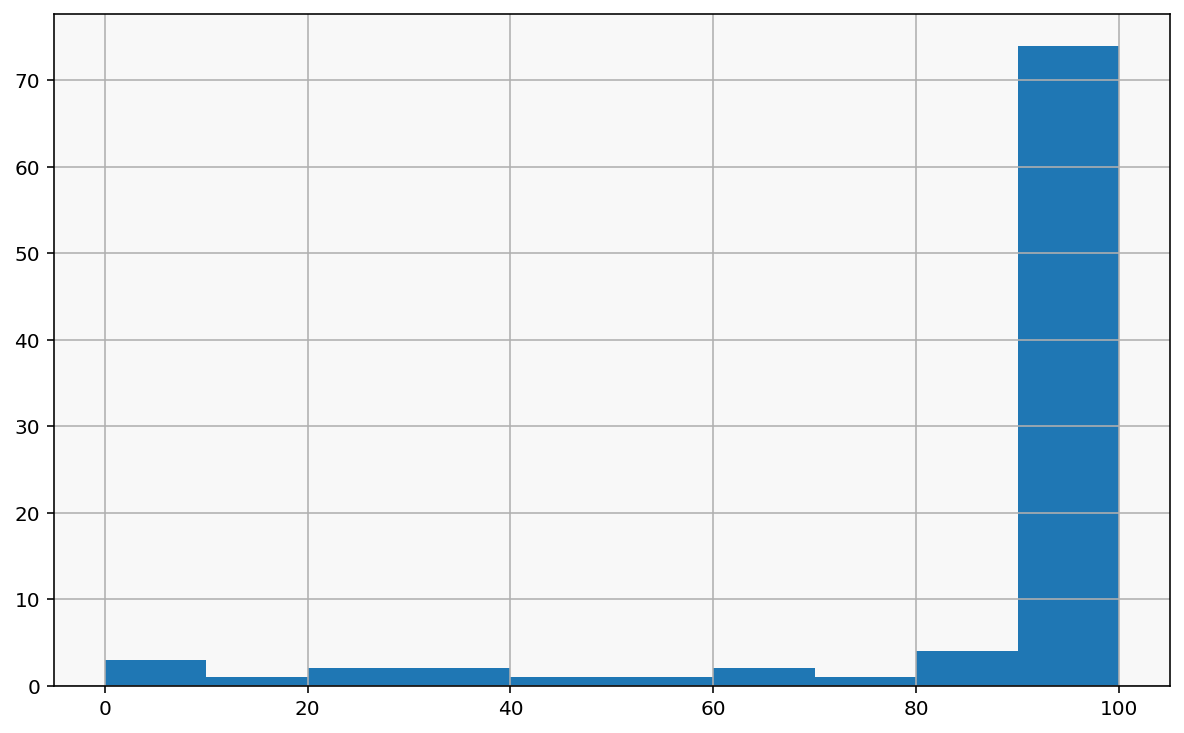

In [36]:
df.cloud_area_fraction.hist()

Another API:

The weather API expects latitude, longitude,
but we have location names.

There's an API for that!

In [37]:
r = requests.get(
    "https://geocode.maps.co/search",
    params={"city": "Bergen", "country": "Norway"},
)
r.json()

[{'place_id': 286402934,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'powered_by': 'Map Maker: https://maps.co',
  'osm_type': 'relation',
  'osm_id': 404159,
  'boundingbox': ['60.1760905', '60.5360925', '5.1445788', '5.6867918'],
  'lat': '60.3943055',
  'lon': '5.3259192',
  'display_name': 'Bergen, Vestland, Norge',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.7312391232119534},
 {'place_id': 62960991,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'powered_by': 'Map Maker: https://maps.co',
  'osm_type': 'node',
  'osm_id': 5638206557,
  'boundingbox': ['59.6009016', '59.6209016', '8.9104283', '8.9304283'],
  'lat': '59.6109016',
  'lon': '8.9204283',
  'display_name': 'Bergen, Hjartdal, Vestfold og Telemark, 3692, Norge',
  'class': 'place',
  'type': 'farm',
  'importance': 0.30999999999999994}]

Write a function to locate a city, returning latitude, longitude as floats

In [44]:
def locate_city(city, country="Norway"):
    """return (lat, lon) for a city"""
    r = requests.get(
        "https://geocode.maps.co/search",
        params={"city": city, "country": country},
    )

    matches = r.json()
    if len(matches) < 1:
        raise ValueError(f"No match for {city}, {country}")

    location = matches[0]
    return (float(location["lat"]), float(location["lon"]))

In [39]:
locate_city("Oslo")

(59.97239745, 10.775729194051895)

In [40]:
locate_city("Bergen")

(59.6109016, 8.9204283)

Exercise:

write a function to get the city forcast, given name and country

1. look up lat, lon from name, country
2. get forecast
3. add 'city' column

In [42]:
def city_forecast(city, country="Norway"):
    lat, lon = locate_city(city, country)
    url = "https://api.met.no/weatherapi/locationforecast/2.0/compact"
    r = s.get(url, params={"lat": lat, "lon": lon})
    tidy_records = [
        tidy_format(record) for record in r.json()["properties"]["timeseries"]
    ]
    df = pd.DataFrame.from_dict(tidy_records)
    df["time"] = pd.to_datetime(df["time"])
    df["city"] = city
    return df


oslo = city_forecast("Oslo")
oslo

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2022-10-27 08:00:00+00:00,1014.7,9.2,97.9,99.9,209.8,2.2,cloudy,fog,0.0,cloudy,0.0,Oslo
1,2022-10-27 09:00:00+00:00,1015.0,9.4,99.7,99.9,211.4,1.5,cloudy,fog,0.0,cloudy,0.0,Oslo
2,2022-10-27 10:00:00+00:00,1015.6,9.8,99.9,99.7,209.3,2.1,cloudy,cloudy,0.0,cloudy,0.0,Oslo
3,2022-10-27 11:00:00+00:00,1015.7,10.5,99.9,96.6,192.7,1.6,cloudy,cloudy,0.0,cloudy,0.0,Oslo
4,2022-10-27 12:00:00+00:00,1015.6,11.1,99.6,93.7,194.9,2.5,cloudy,cloudy,0.0,cloudy,0.0,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2022-11-04 06:00:00+00:00,1001.7,7.1,100.0,99.5,126.4,3.7,cloudy,NaN,NaN,cloudy,0.0,Oslo
76,2022-11-04 12:00:00+00:00,1001.8,8.1,100.0,94.6,158.9,3.3,lightrain,NaN,NaN,cloudy,0.0,Oslo
77,2022-11-04 18:00:00+00:00,1001.7,7.3,100.0,98.6,151.9,3.5,lightrain,NaN,NaN,rain,1.0,Oslo
78,2022-11-05 00:00:00+00:00,997.3,7.9,100.0,98.9,133.3,3.2,NaN,NaN,NaN,cloudy,0.0,Oslo


In [45]:
forecasts = pd.concat(
    city_forecast(city) for city in ("Oslo", "Bergen", " Tromsø", "Trondheim")
)
forecasts

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2022-10-27 09:00:00+00:00,1015.0,10.5,99.7,96.3,353.5,0.8,cloudy,cloudy,0.0,cloudy,0.0,Oslo
1,2022-10-27 10:00:00+00:00,1015.5,11.5,99.9,93.1,309.3,1.0,cloudy,cloudy,0.0,partlycloudy_day,0.0,Oslo
2,2022-10-27 11:00:00+00:00,1015.5,12.2,99.7,91.6,340.0,0.3,cloudy,cloudy,0.0,partlycloudy_day,0.0,Oslo
3,2022-10-27 12:00:00+00:00,1015.5,12.8,99.5,88.9,189.1,1.6,cloudy,cloudy,0.0,partlycloudy_day,0.0,Oslo
4,2022-10-27 13:00:00+00:00,1015.6,12.9,95.5,85.3,189.1,2.2,cloudy,cloudy,0.0,partlycloudy_day,0.0,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2022-11-04 06:00:00+00:00,1000.2,5.7,93.4,81.7,154.2,2.8,cloudy,NaN,NaN,cloudy,0.0,Trondheim
75,2022-11-04 12:00:00+00:00,998.4,9.2,99.2,76.5,159.6,3.2,cloudy,NaN,NaN,cloudy,0.0,Trondheim
76,2022-11-04 18:00:00+00:00,998.1,7.3,100.0,79.4,162.3,3.3,cloudy,NaN,NaN,cloudy,0.0,Trondheim
77,2022-11-05 00:00:00+00:00,999.8,6.4,99.2,82.9,171.3,2.8,NaN,NaN,NaN,cloudy,0.0,Trondheim


In [46]:
forecasts.groupby(["time", "city"])

In [47]:
forecasts.groupby(["time", "city"]).air_temperature

In [48]:
forecasts.groupby(["time", "city"]).air_temperature.first()

time                       city     
2022-10-27 09:00:00+00:00   Tromsø       2.9
                           Bergen       12.7
                           Oslo         10.5
                           Trondheim     8.8
2022-10-27 10:00:00+00:00   Tromsø       2.8
                                        ... 
2022-11-05 00:00:00+00:00  Trondheim     6.4
2022-11-05 06:00:00+00:00   Tromsø       2.8
                           Bergen        8.7
                           Oslo          7.8
                           Trondheim     5.9
Name: air_temperature, Length: 316, dtype: float64

In [49]:
forecasts.groupby(["time", "city"]).air_temperature.first().unstack()

city,Tromsø,Bergen,Oslo,Trondheim
time,,,,
2022-10-27 09:00:00+00:00,2.9,12.7,10.5,8.8
2022-10-27 10:00:00+00:00,2.8,13.0,11.5,9.8
2022-10-27 11:00:00+00:00,2.8,13.3,12.2,10.7
2022-10-27 12:00:00+00:00,2.6,13.4,12.8,10.5
2022-10-27 13:00:00+00:00,1.9,13.4,12.9,10.7
...,...,...,...,...
2022-11-04 06:00:00+00:00,1.0,8.6,8.8,5.7
2022-11-04 12:00:00+00:00,3.5,10.3,9.5,9.2
2022-11-04 18:00:00+00:00,2.0,9.2,8.9,7.3


<AxesSubplot:xlabel='time'>

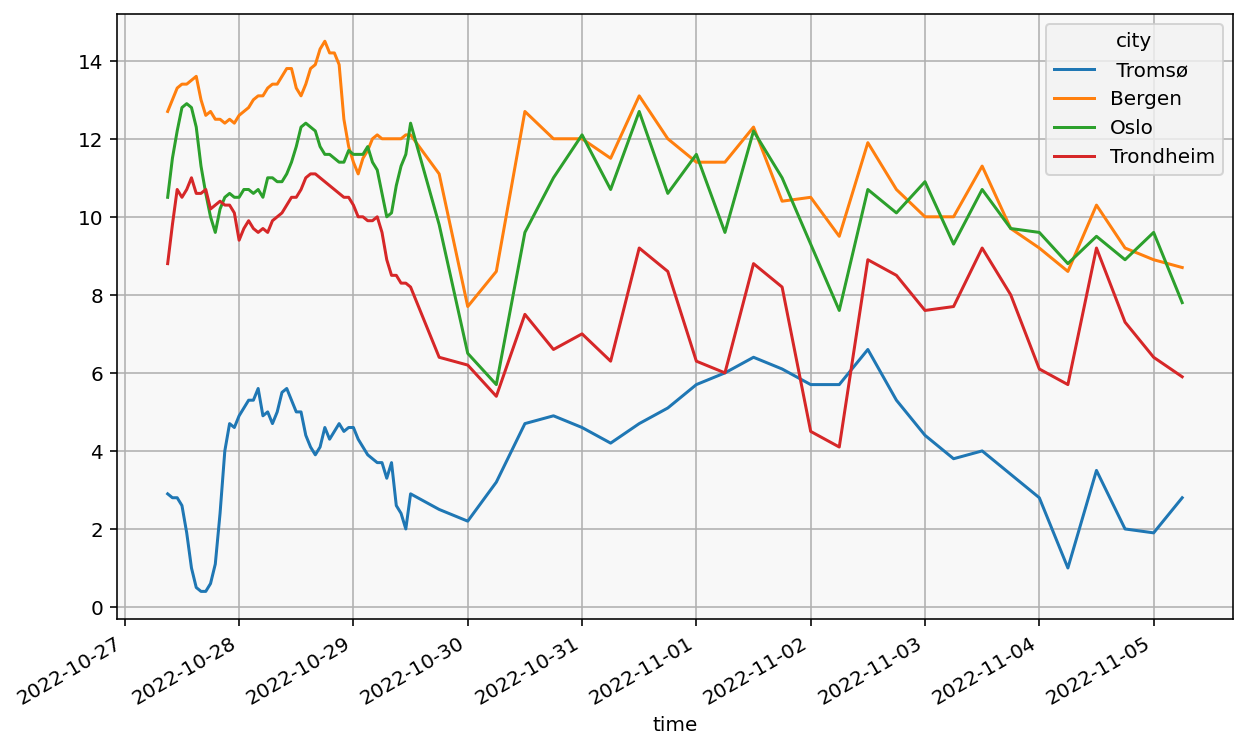

In [50]:
forecasts.groupby(["time", "city"]).air_temperature.first().unstack().plot()

<AxesSubplot:xlabel='time'>

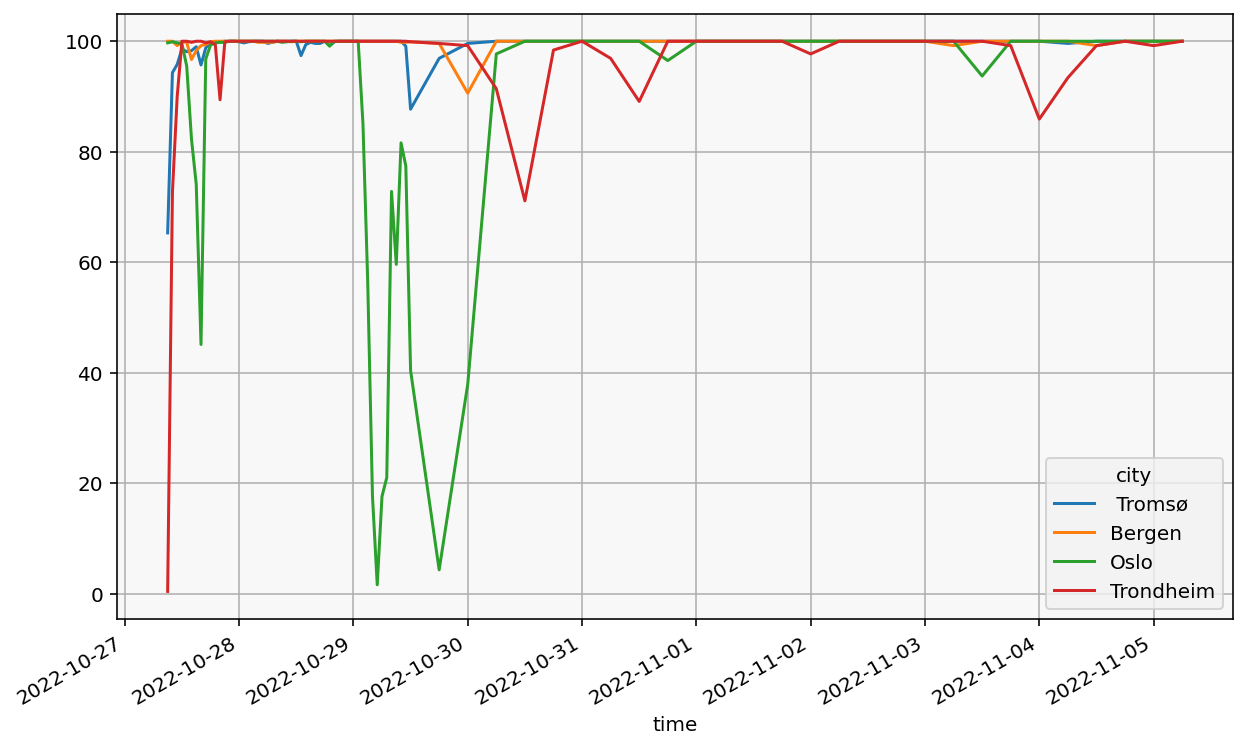

In [51]:
forecasts.groupby(["time", "city"]).cloud_area_fraction.first().unstack().plot()

<AxesSubplot:xlabel='next_1_hours_symbol_code'>

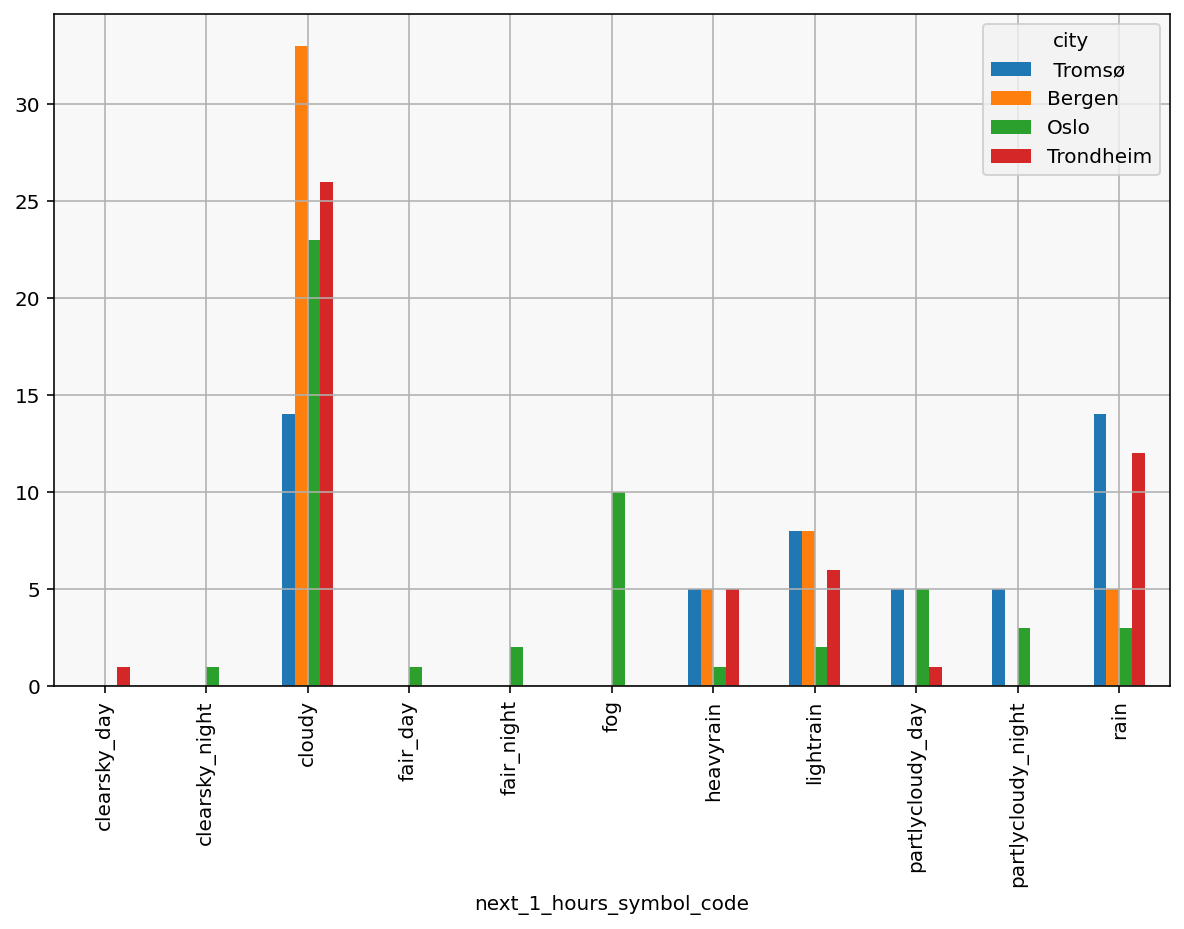

In [52]:
forecasts.groupby(
    ["next_1_hours_symbol_code", "city"]
).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

I don't really care about day/night. How do we remove that?

In [53]:
forecasts["next_1_hours_symbol_code"].value_counts()

cloudy                96
rain                  34
lightrain             24
heavyrain             16
partlycloudy_day      11
fog                   10
partlycloudy_night     8
fair_night             2
clearsky_night         1
fair_day               1
clearsky_day           1
Name: next_1_hours_symbol_code, dtype: int64

In [56]:
forecasts["next_1_hours_symbol_code"].str.split("_", n=1, expand=True).value_counts()

0             1    
partlycloudy  day      11
              night     8
fair          night     2
clearsky      day       1
              night     1
fair          day       1
dtype: int64

In [54]:
forecasts["next_1_hours_symbol_code"].str.split("_", n=1, expand=True)

0     cloudy
1     cloudy
2     cloudy
3     cloudy
4     cloudy
       ...  
74       NaN
75       NaN
76       NaN
77       NaN
78       NaN
Name: 0, Length: 316, dtype: object

In [57]:
for n in (1, 6, 12):
    forecasts[f"next_{n}_hours_symbol_code_clean"] = forecasts[
        f"next_{n}_hours_symbol_code"
    ].str.split("_", n=1, expand=True)[0]

<AxesSubplot:xlabel='next_1_hours_symbol_code_clean'>

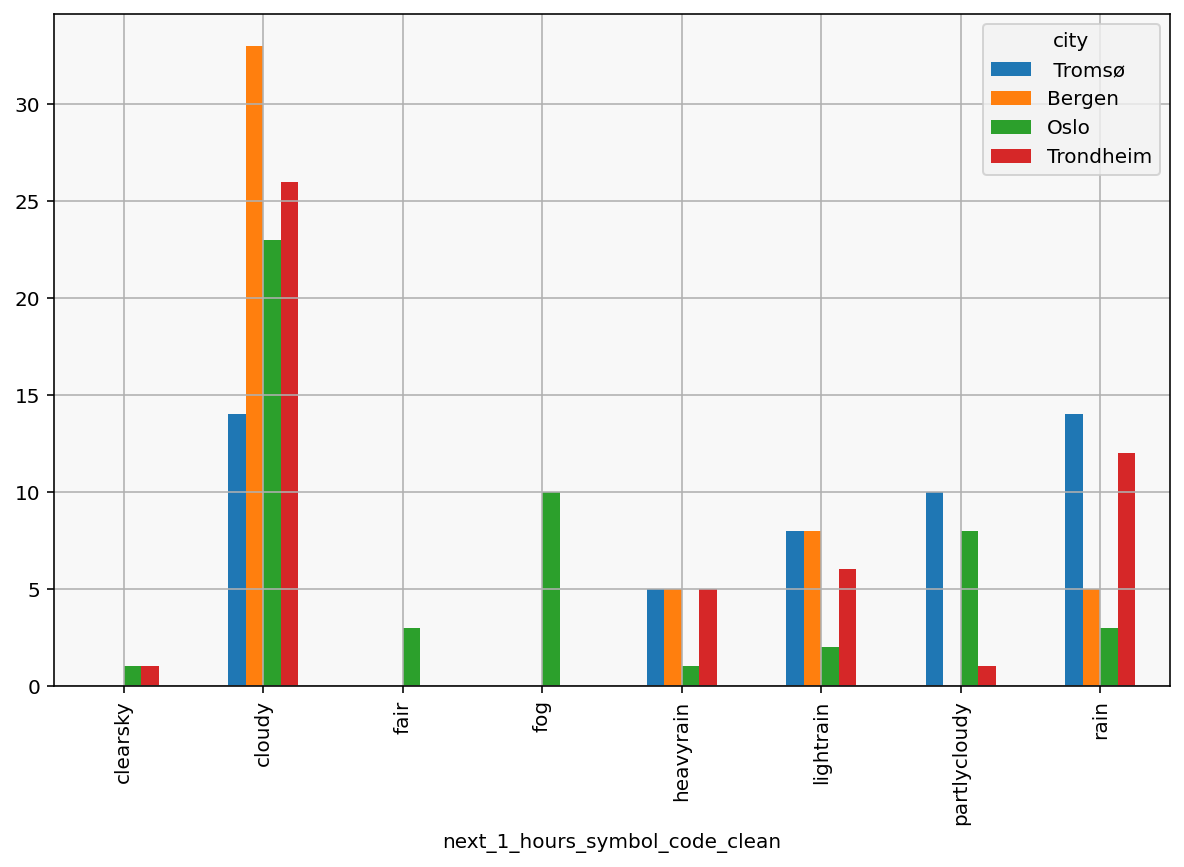

In [58]:
forecasts.groupby(
    ["next_1_hours_symbol_code_clean", "city"]
).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

<AxesSubplot:xlabel='next_6_hours_symbol_code_clean'>

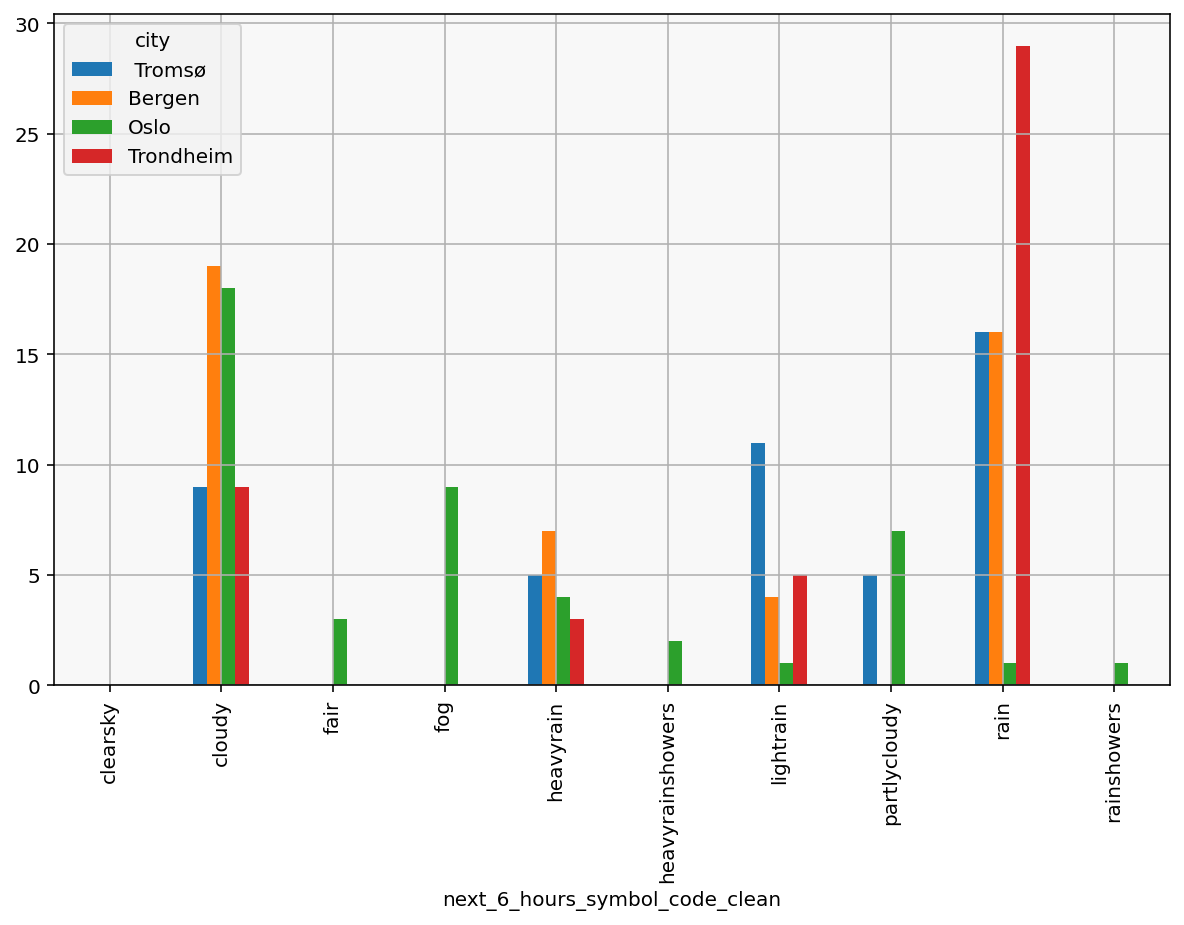

In [59]:
forecasts.groupby(
    ["next_6_hours_symbol_code_clean", "city"]
).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

<AxesSubplot:xlabel='time'>

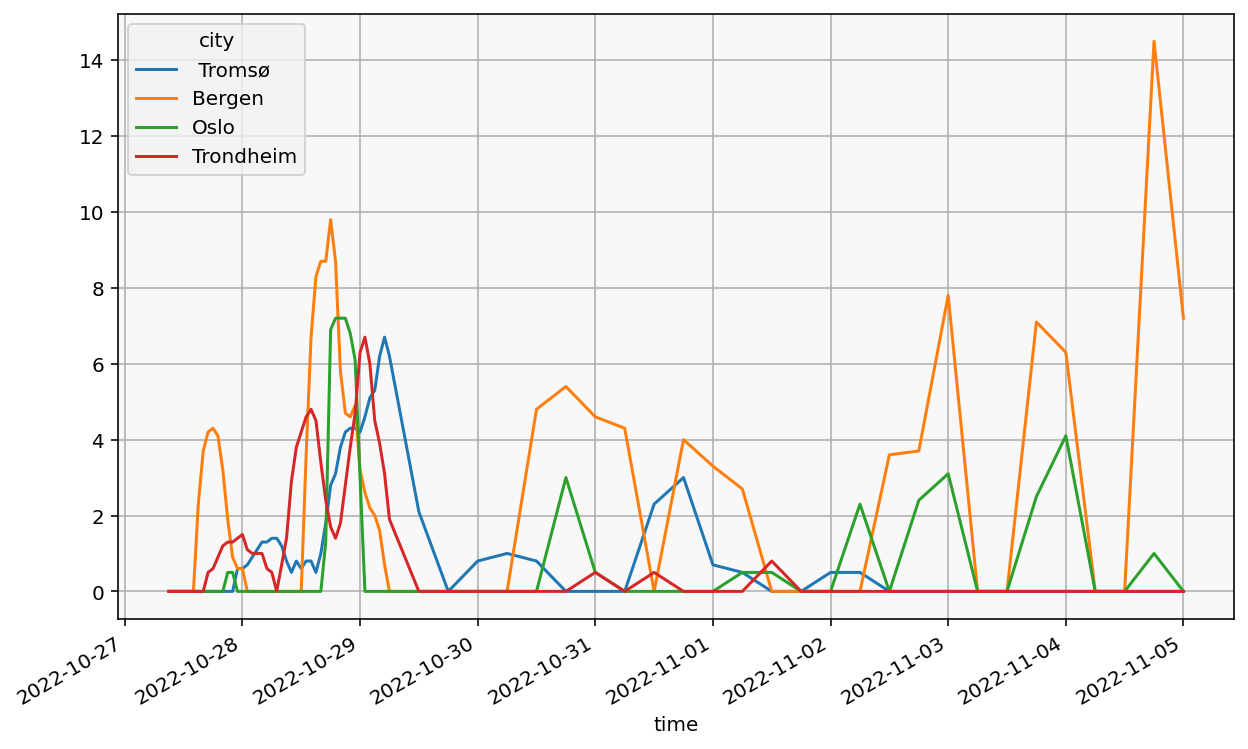

In [60]:
forecasts.groupby(
    ["time", "city"]
).next_6_hours_precipitation_amount.first().unstack().dropna().plot()